# Case - Stock

This notebook covers the data analysis case using Stock data downloaded using QUandl. Key points:
- `iloc[a:b,c:d]` - is used to choose the rows `[a,b)` and columns `[c,d)` from out dataframe.
- **pct_change()** is used to calculate the percentage change for a column.
- as the very first value has no previous value, there is no percentage change that we can calculate for it, thus, we get a missing value that we need to drop.
- to filter rows from a dataframe that satisfy certain condition, we put the condition inside `[]` brackets. If some conditions should be satisfied simultaneously we put `&` (stands for AND), if it is enough to satisfy at least one of the conditions we put `|` (stands for OR).
- to rename columns of the dataframe we use **`data.columns =`** approach where on the right hand side we provide the list of new column names.
- to classify change in stock price as High or Low, we define a function and apply it to the Open_change column using **`apply()`**.
- **pivot_table()** was used to create a pivot table that will show median price for each class (Higher and Lower).

In [1]:
import quandl #to get the data
import pandas as pd #to maniuplate data
import numpy as np #for math functions
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting

In [2]:
data = quandl.get("WIKI/AAPL")

In [4]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [7]:
# choose only first 4 columns
small_data = data.iloc[:,0:4]

In [9]:
small_data.head(3)

,Open,High,Low,Close
Date,,,,
1980-12-12,28.75,28.87,28.75,28.75
1980-12-15,27.38,27.38,27.25,27.25
1980-12-16,25.37,25.37,25.25,25.25


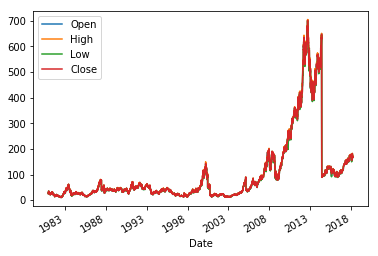

In [10]:
small_data.plot()

In [12]:
# calculate percentage change of hte opening price and save it
small_data["Open_change"] = small_data.Open.pct_change()

C:\Users\ADStudent\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
small_data.head(3)

,Open,High,Low,Close,Open_change
Date,,,,,
1980-12-12,28.75,28.87,28.75,28.75,NaN
1980-12-15,27.38,27.38,27.25,27.25,-0.047652
1980-12-16,25.37,25.37,25.25,25.25,-0.073411


In [15]:
#no percentag echange for the first row (we get missing value), drop it
small_data = small_data.dropna()
small_data.head(3)

,Open,High,Low,Close,Open_change
Date,,,,,
1980-12-15,27.38,27.38,27.25,27.25,-0.047652
1980-12-16,25.37,25.37,25.25,25.25,-0.073411
1980-12-17,25.87,26.00,25.87,25.87,0.019708


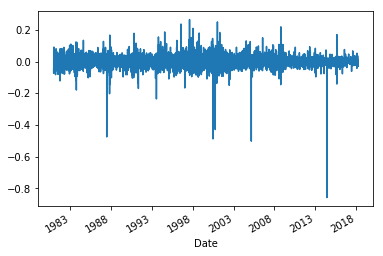

In [16]:
small_data.Open_change.plot()

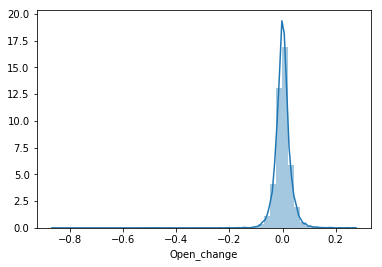

In [17]:
sns.distplot(small_data.Open_change)

In [28]:
# choose rows that present change in (-0.8,-0.4) with &
# choose rows that present change in (-inf, -0.8) u (-0.4,+inf) with |
condition_1 = small_data.Open_change>-0.4
condition_2 = small_data.Open_change<-0.8
small_data.Open_change[condition_1 & condition_2]
small_data.Open_change[condition_1 | condition_2]

Date
1980-12-15   -0.047652
1980-12-16   -0.073411
1980-12-17    0.019708
1980-12-18    0.029378
1980-12-19    0.060834
1980-12-22    0.048850
1980-12-23    0.042187
1980-12-24    0.052461
1980-12-26    0.092308
1980-12-29    0.014085
1980-12-30   -0.020833
1980-12-31   -0.028369
1981-01-02    0.007299
1981-01-05   -0.018261
1981-01-06   -0.044287
1981-01-07   -0.042323
1981-01-08   -0.020323
1981-01-09    0.049720
1981-01-12    0.000000
1981-01-13   -0.039210
1981-01-14    0.000000
1981-01-15    0.020242
1981-01-16   -0.004160
1981-01-19    0.056234
1981-01-20   -0.026468
1981-01-21    0.015625
1981-01-22    0.011385
1981-01-23    0.000000
1981-01-26   -0.015211
1981-01-27   -0.003707
                ...   
2018-02-13    0.021767
2018-02-14    0.006761
2018-02-15    0.041369
2018-02-16    0.015136
2018-02-20   -0.001799
2018-02-21    0.004534
2018-02-22   -0.005960
2018-02-23    0.010885
2018-02-26    0.015432
2018-02-27    0.015594
2018-02-28    0.000893
2018-03-01   -0.004017
2018-0

In [29]:
small_data.head(3)

,Open,High,Low,Close,Open_change
Date,,,,,
1980-12-15,27.38,27.38,27.25,27.25,-0.047652
1980-12-16,25.37,25.37,25.25,25.25,-0.073411
1980-12-17,25.87,26.00,25.87,25.87,0.019708


In [30]:
#create a function to classify positive change as Higher, rest as Lower
def classifier(x):
    if x>0:
        output = "Higher"
    else:
        output = "Lower"
    return output

In [32]:
#apply function above to the percentage change column
small_data.Open_change.apply(classifier)

Date
1980-12-15     Lower
1980-12-16     Lower
1980-12-17    Higher
1980-12-18    Higher
1980-12-19    Higher
1980-12-22    Higher
1980-12-23    Higher
1980-12-24    Higher
1980-12-26    Higher
1980-12-29    Higher
1980-12-30     Lower
1980-12-31     Lower
1981-01-02    Higher
1981-01-05     Lower
1981-01-06     Lower
1981-01-07     Lower
1981-01-08     Lower
1981-01-09    Higher
1981-01-12     Lower
1981-01-13     Lower
1981-01-14     Lower
1981-01-15    Higher
1981-01-16     Lower
1981-01-19    Higher
1981-01-20     Lower
1981-01-21    Higher
1981-01-22    Higher
1981-01-23     Lower
1981-01-26     Lower
1981-01-27     Lower
               ...  
2018-02-13    Higher
2018-02-14    Higher
2018-02-15    Higher
2018-02-16    Higher
2018-02-20     Lower
2018-02-21    Higher
2018-02-22     Lower
2018-02-23    Higher
2018-02-26    Higher
2018-02-27    Higher
2018-02-28    Higher
2018-03-01     Lower
2018-03-02     Lower
2018-03-05    Higher
2018-03-06    Higher
2018-03-07     Lower
2018-03-

In [34]:
#complete the task above but instead of comparing with 0 compare to the median
def classifier_2(z):
    if z>small_data.Open.median():
        output="H"
    else:
        output="L"
    return output

In [36]:
small_data.Open.apply(classifier_2)

Date
1980-12-15    L
1980-12-16    L
1980-12-17    L
1980-12-18    L
1980-12-19    L
1980-12-22    L
1980-12-23    L
1980-12-24    L
1980-12-26    L
1980-12-29    L
1980-12-30    L
1980-12-31    L
1981-01-02    L
1981-01-05    L
1981-01-06    L
1981-01-07    L
1981-01-08    L
1981-01-09    L
1981-01-12    L
1981-01-13    L
1981-01-14    L
1981-01-15    L
1981-01-16    L
1981-01-19    L
1981-01-20    L
1981-01-21    L
1981-01-22    L
1981-01-23    L
1981-01-26    L
1981-01-27    L
             ..
2018-02-13    H
2018-02-14    H
2018-02-15    H
2018-02-16    H
2018-02-20    H
2018-02-21    H
2018-02-22    H
2018-02-23    H
2018-02-26    H
2018-02-27    H
2018-02-28    H
2018-03-01    H
2018-03-02    H
2018-03-05    H
2018-03-06    H
2018-03-07    H
2018-03-08    H
2018-03-09    H
2018-03-12    H
2018-03-13    H
2018-03-14    H
2018-03-15    H
2018-03-16    H
2018-03-19    H
2018-03-20    H
2018-03-21    H
2018-03-22    H
2018-03-23    H
2018-03-26    H
2018-03-27    H
Name: Open, Length:

In [38]:
small_data["Classes"] = np.where(small_data.Open>small_data.Open.median(),"Higher","Lower")

C:\Users\ADStudent\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
small_data.head(3)

,Open,High,Low,Close,Open_change,Classes
Date,,,,,,
1980-12-15,27.38,27.38,27.25,27.25,-0.047652,Lower
1980-12-16,25.37,25.37,25.25,25.25,-0.073411,Lower
1980-12-17,25.87,26.00,25.87,25.87,0.019708,Lower


In [48]:
# create a pivot table to show median price for each class
data_pivot = pd.pivot_table(data=small_data,values="Open",index="Classes",aggfunc="median")

In [49]:
data_pivot

,Open
Classes,
Higher,110.12
Lower,27.00


In [50]:
small_data.head(3)

,Open,High,Low,Close,Open_change,Classes
Date,,,,,,
1980-12-15,27.38,27.38,27.25,27.25,-0.047652,Lower
1980-12-16,25.37,25.37,25.25,25.25,-0.073411,Lower
1980-12-17,25.87,26.00,25.87,25.87,0.019708,Lower


In [53]:
#rename columns
small_data.columns = ['Open', 'High', 'Low', 'Close', 'Pct_change', 'Classes']

In [54]:
small_data.head()

,Open,High,Low,Close,Pct_change,Classes
Date,,,,,,
1980-12-15,27.38,27.38,27.25,27.25,-0.047652,Lower
1980-12-16,25.37,25.37,25.25,25.25,-0.073411,Lower
1980-12-17,25.87,26.00,25.87,25.87,0.019708,Lower
1980-12-18,26.63,26.75,26.63,26.63,0.029378,Lower
1980-12-19,28.25,28.38,28.25,28.25,0.060834,Lower
